In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("DATA SET/Customers.csv")
transactions = pd.read_csv("DATA SET/Transactions.csv")

In [3]:
# Mergeing customer and transaction data
data = transactions.merge(customers, on="CustomerID")

In [5]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [6]:
# Aggregate data for clustering
customer_data = data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending
    "Quantity": "sum",    # Total quantity purchased
    "Price": "mean",      # Average transaction value
}).reset_index()

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data.iloc[:, 1:])

In [8]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

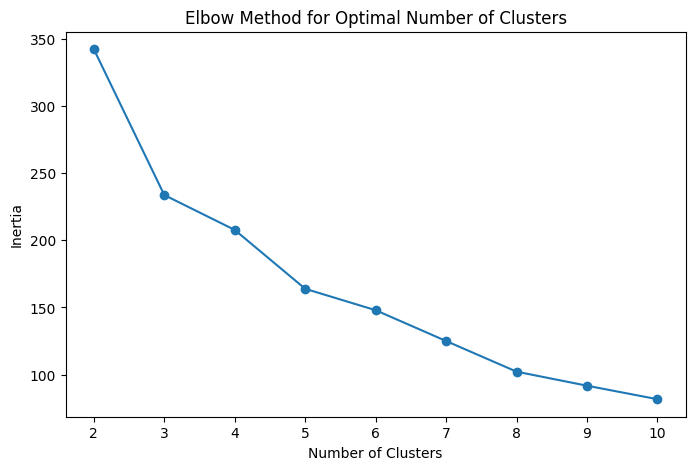

In [9]:
# Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [12]:
# Chooseing optimal number of clusters 
optimal_k = 4

In [13]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
customer_data['Cluster'] = kmeans.labels_

In [14]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.12180191226693


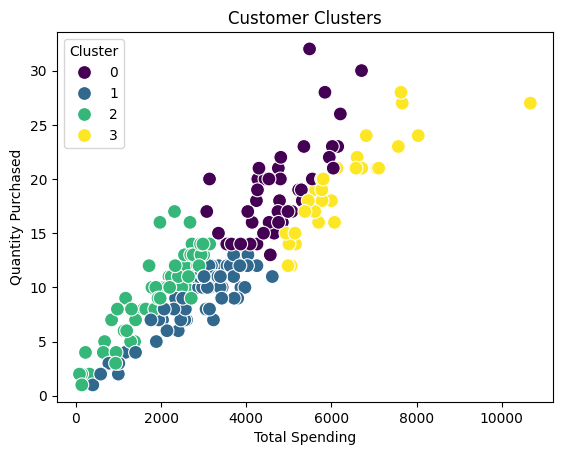

In [17]:
# Visualize clusters
sns.scatterplot(
    x=customer_data['TotalValue'], 
    y=customer_data['Quantity'], 
    hue=customer_data['Cluster'], 
    palette='viridis', 
    s=100
)
plt.xlabel('Total Spending')
plt.ylabel('Quantity Purchased')
plt.title('Customer Clusters')
plt.legend(title='Cluster')
plt.show()

In [16]:
customer_data.to_csv("Mohammed_Junaid_Clustering.csv", index=False)